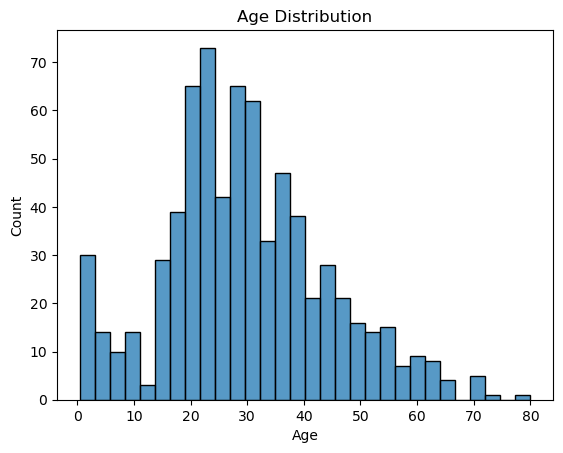

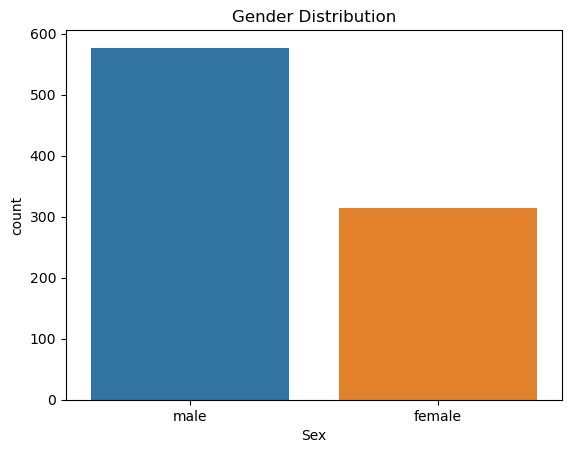

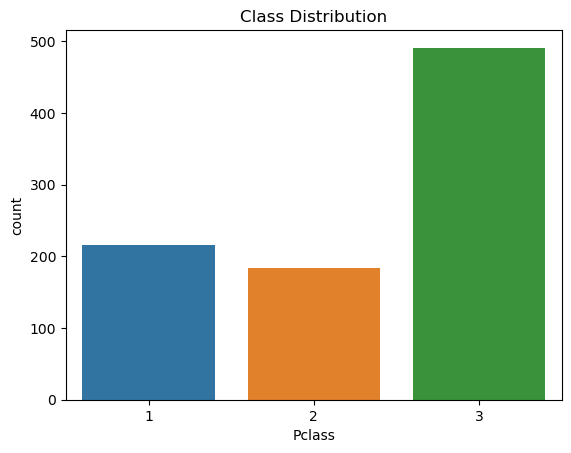

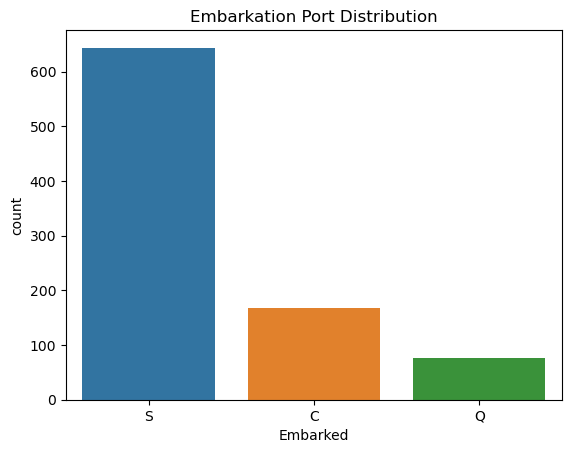

Age         177
Cabin       687
Embarked      2
dtype: int64


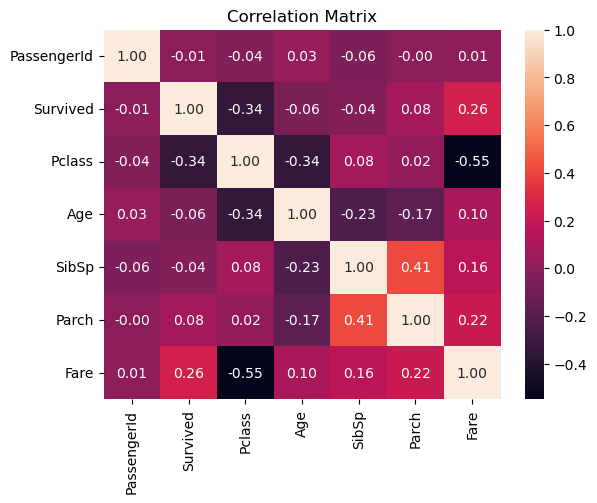

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


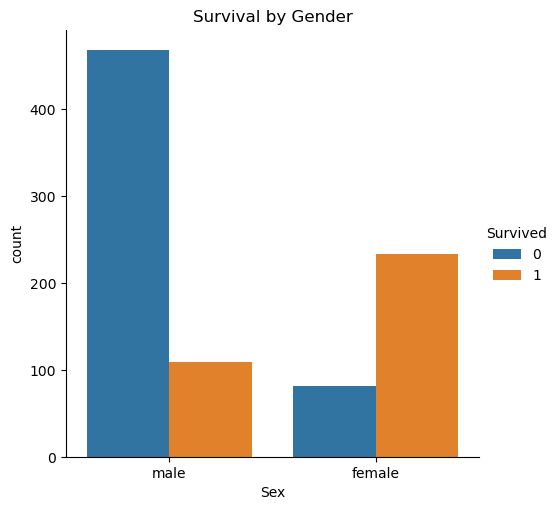

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


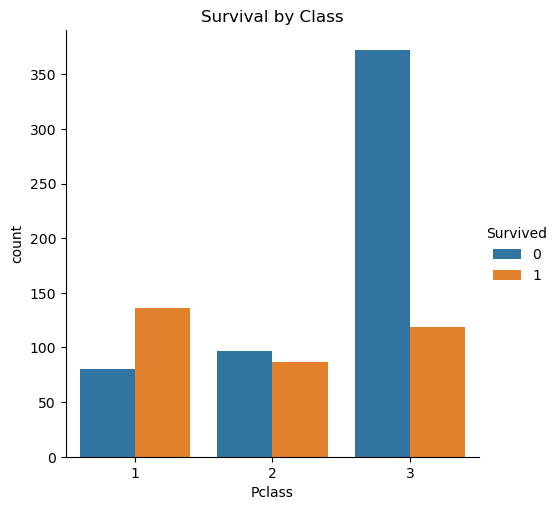

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Analyze distributions of features
def analyze_distributions(df):
    # Age distribution
    sns.histplot(df['Age'].dropna(), kde=False, bins=30)
    plt.title('Age Distribution')
    plt.show()

    # Gender distribution
    sns.countplot(x='Sex', data=df)
    plt.title('Gender Distribution')
    plt.show()

    # Class distribution
    sns.countplot(x='Pclass', data=df)
    plt.title('Class Distribution')
    plt.show()

    # Embarkation port distribution
    sns.countplot(x='Embarked', data=df)
    plt.title('Embarkation Port Distribution')
    plt.show()

# Investigate missing values
def investigate_missing_values(df):
    # Missing values
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Strategies for handling missing values
    # For 'Age', fill in missing values with the median age
    df['Age'].fillna(df['Age'].median(), inplace=True)
    # For 'Embarked', fill in missing values with the mode
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    # For 'Cabin', we might drop it as it has a lot of missing values or fill with a placeholder
    df['Cabin'].fillna('Unknown', inplace=True)

# Explore relationships between features and survival
def explore_relationships(df):
    # Select only numerical columns for correlation matrix
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Correlation matrix
    sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Continue with the rest of your function...

    # Survival by gender
    sns.catplot(x='Sex', hue='Survived', kind='count', data=df)
    plt.title('Survival by Gender')
    plt.show()

    # Survival by class
    sns.catplot(x='Pclass', hue='Survived', kind='count', data=df)
    plt.title('Survival by Class')
    plt.show()


# Run the analysis functions
analyze_distributions(train_df)
investigate_missing_values(train_df)
explore_relationships(train_df)

**Feature Engineering**:

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
train_df = pd.read_csv('train.csv')

# Feature Engineering
# Create a new feature 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Extract titles from the 'Name' column
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Encode categorical variables
# One-hot encoding for 'Sex' and 'Embarked'

# One-hot encoding for 'Sex' and 'Embarked'
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(train_df[['Sex', 'Embarked']]).toarray()
# Update the method to get_feature_names_out
encoded_feature_names = one_hot_encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
train_df = pd.concat([train_df, encoded_df], axis=1)


# Label encoding as an alternative
label_encoder = LabelEncoder()
train_df['Sex_Label'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked_Label'] = label_encoder.fit_transform(train_df['Embarked'])

# Convert 'Age' and 'Fare' into categorical features
# For 'Age', create age groups
age_bins = [0, 12, 18, 60, 80]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

# For 'Fare', create fare groups based on quartiles
fare_bins = pd.qcut(train_df['Fare'], 4, labels=False)
train_df['FareGroup'] = fare_bins

# Drop the original categorical columns after encoding
train_df.drop(['Sex', 'Embarked', 'Name'], axis=1, inplace=True)

# Now the dataset is ready for model training with new features

**Data Preprocessing**:

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
train_df = pd.read_csv('train.csv')

# Impute missing values for 'Age' and 'Fare' using median
imputer = SimpleImputer(strategy='median')
train_df[['Age', 'Fare']] = imputer.fit_transform(train_df[['Age', 'Fare']])

# Scale numerical features
scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

# Split the data into training and validation sets
X = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']  # Target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train can be used to train a machine learning model,
# and X_val and y_val can be used to evaluate its performance.

**Model Selection**:

In [12]:
# Assuming 'Name', 'Ticket', and 'Cabin' are non-numeric columns you wish to drop
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)

# Now you can split your data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with GridSearchCV and model training...

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
train_df = pd.read_csv('train.csv')

# Assuming 'Name', 'Ticket', and 'Cabin' are non-numeric columns you wish to drop
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Impute missing values
X_imputed = imputer.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now you can split your data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_df['Survived'], test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_rf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy}")

# Cross-validation
cv_scores = cross_val_score(best_rf, X_scaled, train_df['Survived'], cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Validation accuracy: 0.8268156424581006
Cross-validation accuracy scores: [0.76536313 0.80337079 0.84269663 0.80337079 0.83707865]
Mean CV accuracy: 0.8103759964848409


**Model Interpretation**:

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load your data
train_df = pd.read_csv('train.csv')

# Separate features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() < 10 and 
                    X[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Split data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=42)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = my_pipeline.score(X_valid, y_valid)
print('Model accuracy score:', score)

# Now you can create the SHAP explainer and calculate SHAP values for the validation set
# ...

Model accuracy score: 0.8435754189944135


**Prediction and Submission**:

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load the training data
train_df = pd.read_csv('train.csv')

# Separate features and target variable from the training data
X_train_full = train_df.drop(['Survived'], axis=1)
y_train_full = train_df['Survived']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == "object"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, train_size=0.8, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Load the test data
test_df = pd.read_csv('test.csv')

# Make predictions using the pipeline
test_preds = my_pipeline.predict(test_df)

# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_df.PassengerId,
                       'Survived': test_preds})
output.to_csv('submission.csv', index=False)

**Iterative Improvement**:

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Separate features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Drop non-numeric columns
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values using imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Preprocess the test data in the same way
test_X = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_X = pd.get_dummies(test_X)
test_X_imputed = imputer.transform(test_X)

# Make predictions with the trained model
test_predictions = model.predict(test_X_imputed)

# Prepare submission file
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})
submission_df.to_csv('titanic_predictions.csv', index=False)